<a href="https://colab.research.google.com/github/AndyGoncalves/Regressao_linear/blob/main/Breast_Cancer_Wisconsin(Diagnostic)_Regressao_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regressão Logística**

##**Conceitos:**

**Regressão Linear:** usada para fazer uma previsão dentro de um espaço contínuo.

**Regressão Logística:** usada para fazer uma diferenciação entre opções, podendo ser binário (Sim ou Não, Aprovado ou Reprovado, etc.) ou múltiplas categorias (diferentes cores, classes, tipo de produto, etc.). Ela modela a probabilidade de um evento ocorrer (número entre 0 e 1) de acordo com as variáveis independentes e é representada através de uma função sigmoide.

**‘Treshold’** (fronteira de decisão): Todos que estiverem com a probabilidade 0.5 ou maior serão classificados como 1 (terão o crédito aprovado) e todos que estiverem abaixo serão classificado como 0 (será reprovado). É um parâmetro alterável, de acordo com nossas decisões de negócio.

**Multicolinearidade:** acontece quando as variáveis independentes possuem relações lineares exatas ou aproximadamente exatas, nas variáveis independentes. Quando existe multicolinearidade, ao identificar as variáveis que tenham uma alta correlação, devemos optar por incluir apenas uma delas.

**'Train/test split':** a divisão em treino e teste é feita para entender qual a performance quando ele está olhando para novos dados.

**Métricas:**
*   **Matriz de confusão**: Essa matriz traz a frequência para cada classificação cruzando a previsão que o modelo gerou com o diagnóstico real.
*   **Acurácia:** % de predições corretas;
*   **Precisão:** % de predições corretas dentro da classe positiva;
*   **Recall:** % de predições corretas dentro da classe esperada como positiva;

CURVA ROC e AUC: 
* **Curva ROC (Receiver Operating Characteristic)** ou Característica de Operação do Receptor: é uma representação gráfica que ilustra o desempenho de um sistema classificador binário à medida que o seu limiar de discriminação varia. É criada quando colocamos no gráfico a taxa de verdadeiro-positivo contra a taxa de falso-positivo para diferentes ''thresholds".
* **AUC (Area under the curve)** ou a Área sob a curva: é a curva ROC transformada em número; representa grau ou medida de separabilidade. Dessa maneira fica mais fácil de comparar essa métrica entre diversos modelos.


## **Roteiro deste caderno:**

1.   Carregar o modelo
2.   Treinar o modelo
3.   Prever com a partição de teste do dataset
4.   Calcular as métricas









In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split #comando vai dividir o dataset em treino e teste, separando as variáveis independentes da nossa variável alvo.
from sklearn.metrics import plot_confusion_matrix, accuracy_score, recall_score, precision_score, plot_roc_curve  # métricas de análise da regressão

In [ ]:
credito = pd.DataFrame({'salario': [0.5, 0.8, 4.7, 3.7, 2.5, 1.1, 1.6, 2.7, 4.2, 4.8], 'aprovado': [0, 0, 1, 1, 0, 0, 0, 1, 1, 1]})

In [ ]:
#'salario' representa os ganhos mensais em R$1.000. 
#coluna "aprovado" significa:
#"0" representa os clientes que tiveram o crédito reprovado
#"1" aqueles que tiveram o crédito aprovado.
credito

,salario,aprovado
0,0.5,0
1,0.8,0
2,4.7,1
3,3.7,1
4,2.5,0
5,1.1,0
6,1.6,0
7,2.7,1
8,4.2,1
9,4.8,1


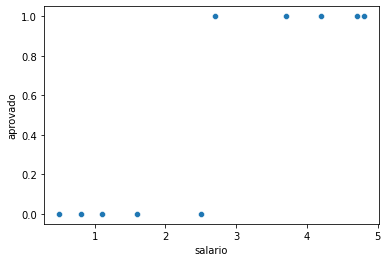

In [ ]:
sns.scatterplot(x=credito['salario'], y=credito['aprovado'])

## **Exemplo teórico de REGRESSÃO LOGÍSTICA**

A regressão logística será usada para calcular a probabilidade de aprovação de crédito dado o salário de um novo cliente.

In [ ]:
lr = LogisticRegression().fit(credito[['salario']], credito['aprovado'])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


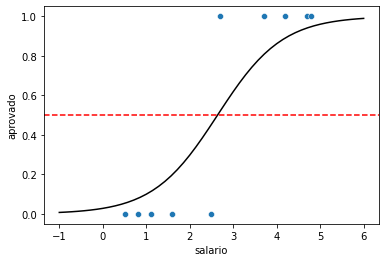

In [ ]:
X = np.linspace(-1, 6)
proba = lr.predict_proba(X.reshape(-1, 1)).T[1]

chart = sns.scatterplot(x=credito['salario'], y=credito['aprovado'])
sns.lineplot(x=X, y=proba, color='black')
chart.axhline(0.5, ls='--', color='red')

# **Breast Cancer Wisconsin (Diagnostic)**

Dataset: Breast Cancer Wisconsin (Diagnostic), disponibilizado pelo Scikit-learn. A variável alvo classifica como 1 o tumor maligno e 0 o Benigno. As demais variáveis são calculadas a partir de uma imagem digitalizada de uma massa mamária. Eles descrevem características dos núcleos celulares presentes na imagem.

In [ ]:
#Carregando o Dataset
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
#dataset

In [ ]:
variaveis = pd.DataFrame(dataset.data, columns=dataset.feature_names)

target = pd.Series(dataset.target, name='diagnostico')

df = pd.concat([variaveis, target], axis=1)

## EDA

**Quais variáveis eu enxergo uma distribuição em que elas sejam mais distantes?**
Motivo: diferenciar o "tumor maligno do benigno".

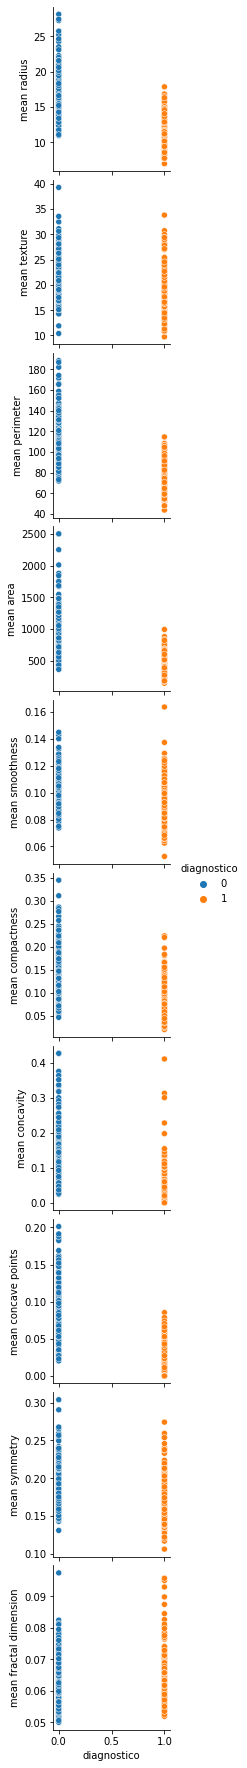

In [ ]:
sns.pairplot(df, x_vars=['diagnostico'], y_vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness',
              'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension'], hue='diagnostico')

**Há multicolinearidade entre as variáveis independentes?**

"mean radius", "mean perimeter" e "mean area" tem uma correlação quase próxima a 1. Então devemos optar pela inclusão de apenas uma delas na regressão.

In [ ]:
df[['diagnostico', 'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity',
    'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']].corr()

,diagnostico,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
diagnostico,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.596534,-0.696360,-0.776614,-0.330499,0.012838
mean radius,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.506124,0.676764,0.822529,0.147741,-0.311631
mean texture,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.236702,0.302418,0.293464,0.071401,-0.076437
mean perimeter,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.556936,0.716136,0.850977,0.183027,-0.261477
mean area,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.498502,0.685983,0.823269,0.151293,-0.283110
mean smoothness,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.659123,0.521984,0.553695,0.557775,0.584792
mean compactness,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,1.000000,0.883121,0.831135,0.602641,0.565369
mean concavity,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.883121,1.000000,0.921391,0.500667,0.336783
mean compactness,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,1.000000,0.883121,0.831135,0.602641,0.565369
mean concavity,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.883121,1.000000,0.921391,0.500667,0.336783


Dividir dataset

In [ ]:
#'test_size': indica o percentual do dataset que será separado para teste, no caso 25%.
#'random_state': indica como a divisão é feita de maneira aleatória

X_train, X_test, y_train, y_test = train_test_split(variaveis[['mean radius', 'mean texture', 'mean symmetry']], target, test_size=0.25, random_state=101)

In [ ]:
lr = LogisticRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

## REGRESSÃO LOGÍSTICA

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


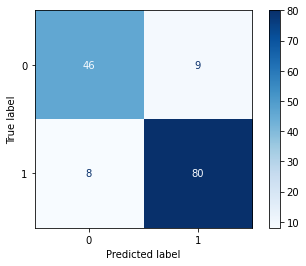

In [ ]:
#A variável alvo classifica como 1- tumor maligno e 0 - Benigno.
#Matriz de confusão. Essa matriz traz a frequência para cada classificação cruzando a previsão que o modelo gerou com o diagnóstico real.
#Interpretação da matriz de confusão é conforme as coordenadas:
#(0,1) = 8 - erro - significa que oito casos de diagnóstico Maligno, o modelo previu como Benigno;
#(1,0) = 9 - erro - significa que nove casos onde o diagnóstico real era Benigno, o modelo classificou incorretamente como Maligno.
#(0,0) = 46 - coerência - significa que quarenta e seis casos onde o diagnóstico real era Benigno, continuou como Benigno.
#(1,1) = 80 - coerêencia - significa que oitenta casos onde o diagnóstico real era Maligno, continuou como Maligno.
plot_confusion_matrix(lr, X_test, y_test, cmap='Blues')

In [ ]:
#Acurácia: 0.88% de predições corretas
#Precisão:0.89% de predições corretas dentro da classe positiva
#Recall: 0.90% de predições corretas dentro da classe esperada como positiva

print(f'Acurácia: {accuracy_score(y_test, y_pred_lr)}\n\Precisão: {precision_score(y_test, y_pred_lr)}\n\
      Recall: {recall_score(y_test, y_pred_lr)}')

Acurácia: 0.8811188811188811
\Precisão: 0.898876404494382
      Recall: 0.9090909090909091


CURVA ROC e AUC

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


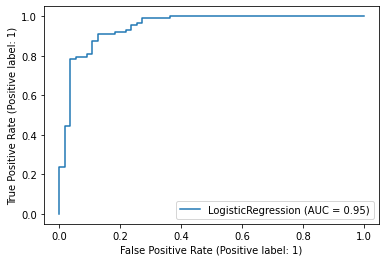

In [ ]:
plot_roc_curve(lr, X_test, y_test)

## **SVM**

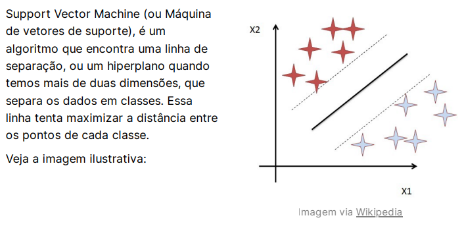

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


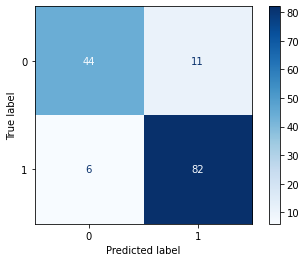

In [ ]:
plot_confusion_matrix(svm, X_test, y_test, cmap='Blues')

In [ ]:
print(f'Acurácia: {accuracy_score(y_test, y_pred_svm)}\n\Precisão: {precision_score(y_test, y_pred_svm)}\n\
      Recall: {recall_score(y_test, y_pred_svm)}')

Acurácia: 0.8811188811188811
\Precisão: 0.8817204301075269
      Recall: 0.9318181818181818


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


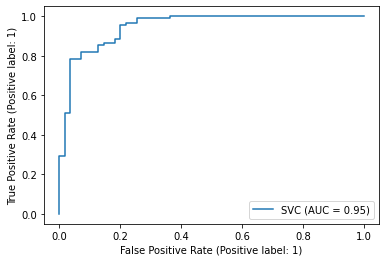

In [ ]:
plot_roc_curve(svm, X_test, y_test)

## **KNN** 

Cada observação será classificada de acordo com os seus vizinhos. Se k for igual a 3, a nova observação será comparada com os 3 vizinhos mais próximos e a classe a que pertencer a maioria desses vizinhos será atribuída à nova observação.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


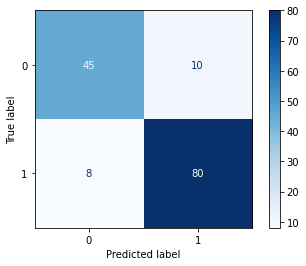

In [ ]:
plot_confusion_matrix(knn, X_test, y_test, cmap='Blues')

In [ ]:
print(f'Acurácia: {accuracy_score(y_test, y_pred_knn)}\n\Precisão: {precision_score(y_test, y_pred_knn)}\n\
      Recall: {recall_score(y_test, y_pred_knn)}')

Acurácia: 0.8741258741258742
\Precisão: 0.8888888888888888
      Recall: 0.9090909090909091


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


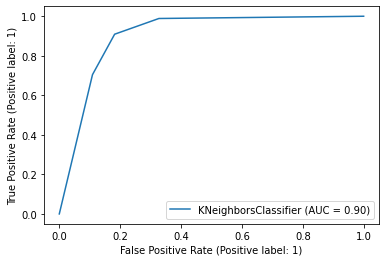

In [ ]:
plot_roc_curve(knn, X_test, y_test)

## **Naive Bayes**

É um classificador probabilístico com base na aplicação do teorema de Bayes com a suposição “ingênua” de independência condicional entre cada variável.

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


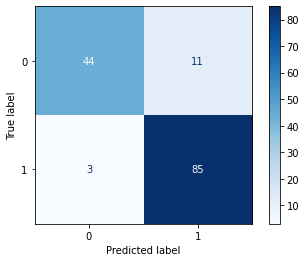

In [ ]:
plot_confusion_matrix(nb, X_test, y_test, cmap='Blues')

In [ ]:
print(f'Acurácia: {accuracy_score(y_test, y_pred_nb)}\n\Precisão: {precision_score(y_test, y_pred_nb)}\n\
      Recall: {recall_score(y_test, y_pred_nb)}')

Acurácia: 0.9020979020979021
\Precisão: 0.8854166666666666
      Recall: 0.9659090909090909


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


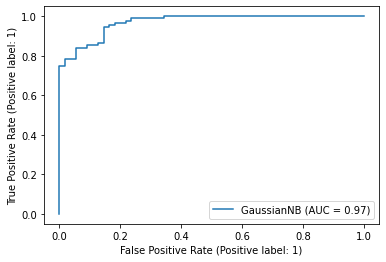

In [ ]:
plot_roc_curve(nb, X_test, y_test)

## **ÁRVORE DE DECISÃO** 
Uma árvore de decisão é uma representação de uma tabela de decisão sob a forma de uma árvore, porém pode haver outras aplicações. Tem a mesma utilidade da tabela de decisão.

Esse modelo irá classificar novas observações através de simples regras de decisão que terá aprendido com o dataset de treino. Uma característica bem legal desse método é que podemos visualizar a regra de cada nó.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train, y_train)
y_pred_dtree = nb.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


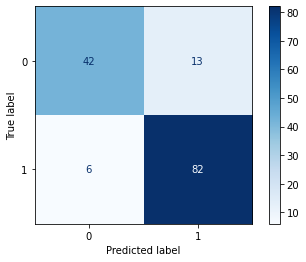

In [ ]:
plot_confusion_matrix(dtree, X_test, y_test, cmap='Blues')

In [ ]:
print(f'Acurácia: {accuracy_score(y_test, y_pred_dtree)}\n\Precisão: {precision_score(y_test, y_pred_dtree)}\n\
      Recall: {recall_score(y_test, y_pred_dtree)}')

Acurácia: 0.9020979020979021
\Precisão: 0.8854166666666666
      Recall: 0.9659090909090909


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


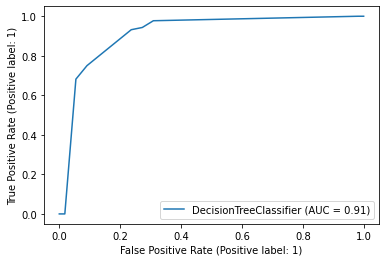

In [ ]:
plot_roc_curve(dtree, X_test, y_test)

[Text(0.5, 0.875, 'mean radius <= 15.045\ngini = 0.465\nsamples = 426\nvalue = [157, 269]\nclass = Maligno'),
 Text(0.25, 0.625, 'mean symmetry <= 0.202\ngini = 0.217\nsamples = 298\nvalue = [37, 261]\nclass = Maligno'),
 Text(0.125, 0.375, 'mean texture <= 19.605\ngini = 0.133\nsamples = 251\nvalue = [18, 233]\nclass = Maligno'),
 Text(0.0625, 0.125, 'gini = 0.035\nsamples = 169\nvalue = [3, 166]\nclass = Maligno'),
 Text(0.1875, 0.125, 'gini = 0.299\nsamples = 82\nvalue = [15, 67]\nclass = Maligno'),
 Text(0.375, 0.375, 'mean radius <= 12.335\ngini = 0.482\nsamples = 47\nvalue = [19, 28]\nclass = Maligno'),
 Text(0.3125, 0.125, 'gini = 0.153\nsamples = 24\nvalue = [2, 22]\nclass = Maligno'),
 Text(0.4375, 0.125, 'gini = 0.386\nsamples = 23\nvalue = [17, 6]\nclass = Benigno'),
 Text(0.75, 0.625, 'mean texture <= 14.955\ngini = 0.117\nsamples = 128\nvalue = [120, 8]\nclass = Benigno'),
 Text(0.625, 0.375, 'mean symmetry <= 0.189\ngini = 0.375\nsamples = 8\nvalue = [2, 6]\nclass = Malig

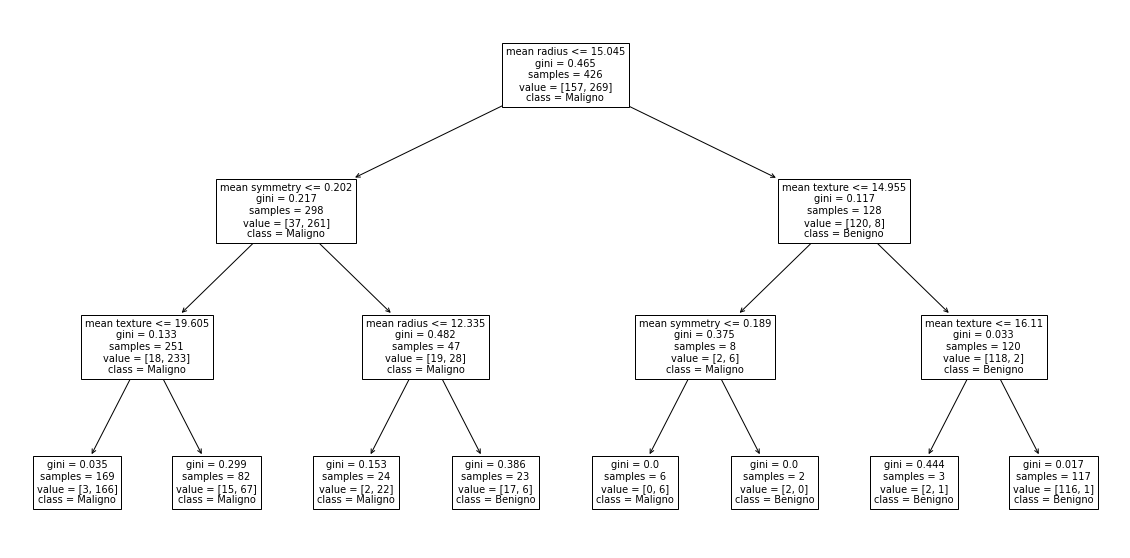

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(dtree, feature_names=['mean radius', 'mean texture', 'mean symmetry'], class_names=['Benigno', 'Maligno'])

# **COMPARANDO MODELOS DE CLASSIFICAÇÃO**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

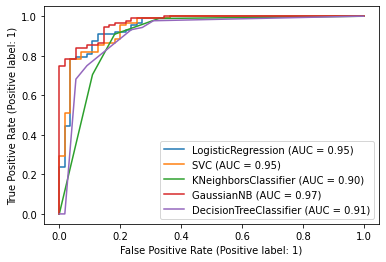

In [ ]:
classifiers = [lr, svm, knn, nb, dtree]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)

In [ ]:
for i in classifiers:
    y_pred = i.predict(X_test)
    print(f'**{type(i).__name__}**')
    print(f'Acurácia: {round(accuracy_score(y_test, y_pred), 2)}\n\Precisão: {round(precision_score(y_test, y_pred), 2)}\n\Recall: {round(recall_score(y_test, y_pred), 2)}')
    print('__________________')

**LogisticRegression**
Acurácia: 0.88
\Precisão: 0.9
\Recall: 0.91
__________________
**SVC**
Acurácia: 0.88
\Precisão: 0.88
\Recall: 0.93
__________________
**KNeighborsClassifier**
Acurácia: 0.87
\Precisão: 0.89
\Recall: 0.91
__________________
**GaussianNB**
Acurácia: 0.9
\Precisão: 0.89
\Recall: 0.97
__________________
**DecisionTreeClassifier**
Acurácia: 0.87
\Precisão: 0.86
\Recall: 0.93
__________________
